* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [1]:
!pip install -U finance-datareader

## 라이브러리 불러오기

In [2]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.31'

In [3]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

In [5]:
# df_krx = pd.read_csv("krx.csv")
# df_krx.shape

In [6]:
# 위 CSV 파일이 로드되지 않아 당황스러우신가요? 그럼 아래 주석을 풀고 다시 KRX 데이터를 받아오세요.
df_krx = fdr.StockListing('KRX')

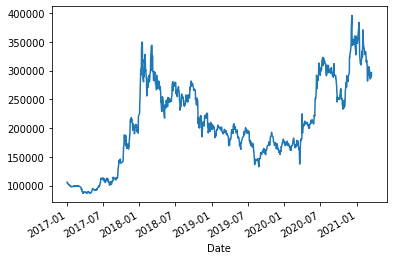

In [7]:
import FinanceDataReader as fdr

# 셀트리온, 2017년~현재

df = fdr.DataReader('068270', '2017')
df['Close'].plot()

In [8]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [9]:
df_krx.loc[df_krx["Name"] == "빅히트", "Symbol"].tolist()[0]

'352820'

In [ ]:
fdr.DataReader("352820")

In [ ]:
df_krx[df_krx["Name"] == "카카오"]["Symbol"]

1989    035720
Name: Symbol, dtype: object

In [ ]:
df_krx.loc[df_krx["Name"] == "카카오", "Symbol"].tolist()[0]

'035720'

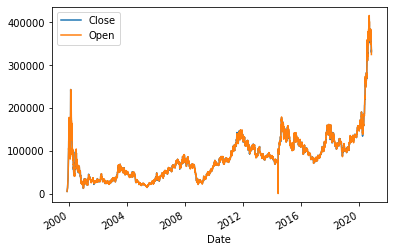

In [ ]:
카카오 = fdr.DataReader("035720")
카카오[["Close", "Open"]].plot()

In [ ]:
name_list = df_krx.loc[df_krx["Name"] == "카카오", "Symbol"].tolist()
name_list

['035720']

In [ ]:
num = [1, 2, 3, 4]
num[1]

2

In [ ]:

if len(name_list) > 0 :
    print(name_list[0])

035720


## 주가 이름으로 종목 코드를 받아오는 함수 만들기

In [ ]:
def item_code(item_name):
    name_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(name_list) > 0:
        return name_list[0]
    else:
        False

item_code("카카오게임즈")

'293490'

In [ ]:
# 주가 이름으로 종목코드 받아오는 함수 만들기

def item_code_by_item_name(item_name):
    name_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(name_list) > 0 :
        item_code = name_list[0]
        return item_code
    else:
        return False

In [ ]:
item_code_by_item_name("NAVER")

'035420'

In [ ]:
item_code_by_item_name("신풍제약")

'019170'

In [ ]:
item_code_by_item_name("씨젠")

'096530'

## 주가 이름으로 종목 데이터 받아오는 함수

In [ ]:
def find_item_list(item_name, year=2020):
    item_code = item_code_by_item_name(item_name)
    df = fdr.DataReader(item_code, str(year))
    return df

In [ ]:
find_item_list("카카오")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,4979,4979,4979,4979,12,NaN
1999-11-12,5557,5557,5557,5557,140,0.116088
1999-11-15,6224,6224,6224,6223,405,0.119849
1999-11-16,6957,6957,6957,6957,214,0.117950
1999-11-17,7780,7780,7780,7779,191,0.118154
...,...,...,...,...,...,...
2020-10-21,351000,361000,351000,353500,516282,0.002837
2020-10-22,351500,352000,345500,349000,376380,-0.012730
2020-10-23,348500,350000,340000,340000,622592,-0.025788


In [ ]:
nc = find_item_list("엔씨소프트")

In [ ]:
nc.to_csv("nc.csv")

In [ ]:
pd.read_csv("nc.csv")

,Date,Open,High,Low,Close,Volume,Change
0,2000-07-11,78400,78400,78400,78400,8,NaN
1,2000-07-12,87800,87800,87800,87800,206,0.119898
2,2000-07-13,98300,98300,98300,98300,92439,0.119590
3,2000-07-14,110000,110000,104500,110000,166400,0.119023
4,2000-07-18,123000,123000,123000,123000,9918,0.118182
...,...,...,...,...,...,...,...
5007,2020-10-21,799000,813000,794000,809000,108005,0.018892
5008,2020-10-22,807000,820000,798000,811000,85163,0.002472
5009,2020-10-23,816000,816000,791000,796000,80718,-0.018496
5010,2020-10-26,794000,809000,788000,796000,49132,0.000000
